### Könyvtárak importálása

In [2]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

### Fejméret dataset beolvasása

In [3]:
df = pd.read_csv('Head_Size.csv')
df.columns=['Nem', 'Kor', 'FejMéret', 'AgySúly']
df.head()

,Nem,Kor,FejMéret,AgySúly
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.shape

(237, 4)

### FejMéret, AgySúly scatter plot (sns.regplot)

In [5]:
X = df['FejMéret']
y = df['AgySúly']

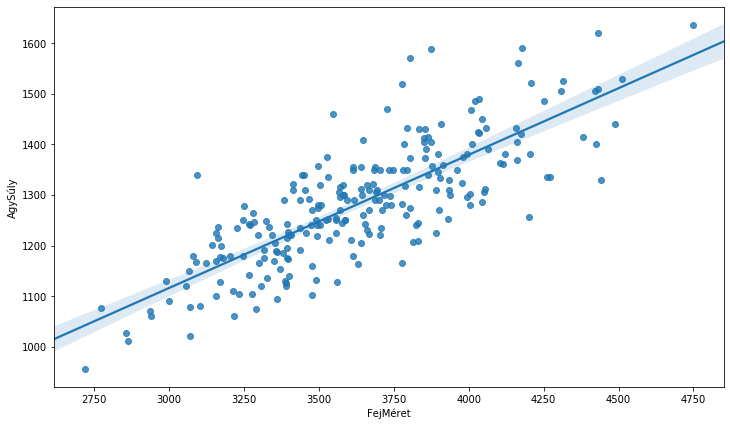

In [6]:
plt.figure(figsize=(12, 7))
sns.regplot(x=X, y=y)

In [6]:
stats.linregress(X, y)

LinregressResult(slope=0.2634293394893993, intercept=325.5734210494428, rvalue=0.7995697092542964, pvalue=5.957630839405777e-54, stderr=0.01290743344088697)

### Xi, Yi, X_átlag, Y_átlag, N

In [7]:
X = df['FejMéret']   #X
y = df['AgySúly']    #Y

X_atlag = np.mean(X) #X átlag
y_atlag = np.mean(y) #Y átlag

n = len(X)           #Adatok számossága
szf = n-1            #Szabadságfok

### B1 értéke

In [8]:
számláló = 0
nevező = 0

for a, b in zip(X, y):
    számláló += (a-X_atlag)*(b-y_atlag)  #B1 számlálója:  SUM[ (Xi - X_átlag)*(Yi-Y_átlag) ]
    nevező += (a-X_atlag)**2             #B1 nevezője:   (Xi-X_átlag)**2
    
B1 = számláló/nevező
print('B1: ', B1)

B1:  0.26342933948939945


### B0 értéke

In [9]:
B0 = y_atlag-B1*X_atlag                #B0: Y_átlag - B1*Xátlag
print('B0: ', B0)

B0:  325.57342104944223


### Ábrázolás

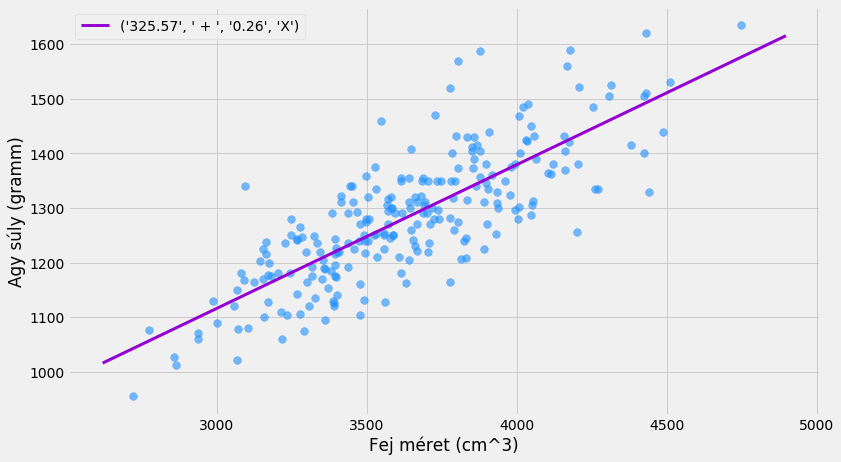

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
plt.scatter(X, y, s=60, alpha=0.6, c='dodgerblue')

vonal_x = np.linspace(np.min(X)-100, np.max(X)+150, 2)
vonal_y = (B0 + B1*(vonal_x))

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), 'X'))
plt.legend()

plt.xlabel('Fej méret (cm^3)')
plt.ylabel('Agy súly (gramm)')

plt.show()

### Prediction

In [11]:
def lin_predict(x):
    return B0 + B1*x

lin_predict(3500)

1247.5761092623402

### R^2

In [12]:
from sklearn.metrics import r2_score

ylin_predicted = list(map(lin_predict, X))
print('R^2: ', r2_score(y, ylin_predicted)) #(tényleges, predicted)

R^2:  0.639311719957


###   
### Kovariancia

In [13]:
kov_szamlalo = 0

for a, b in zip(X, y):
    kov_szamlalo += (a-X_atlag)*(b-y_atlag)
    
kovariancia = kov_szamlalo/szf
print('kovariancia: ', kovariancia)

kovariancia:  35145.6641815061


In [14]:
np.cov(X, y)[0, 1]

35145.66418150611

### Korreláció (=R)

#### R nevezője = szórás(X) * szórás(y)

In [15]:
X_szoras = 0
y_szoras = 0

for a, b in zip(X, y):
    X_szoras += (a - X_atlag)**2
    y_szoras += (b - y_atlag)**2
    
r_nevezo = np.sqrt((X_szoras/szf)*(y_szoras/szf))
print('Korreláció nevezője: ',r_nevezo)

Korreláció nevezője:  43955.722402595835


##### numpy

In [16]:
np.std(X, ddof=1)*np.std(y, ddof=1)

43955.722402595835

### R, R^2

In [17]:
r_val = kovariancia/r_nevezo
print('Korreláció R értéke: ', r_val)
print('         R^2 értéke: ', r_val**2)

Korreláció R értéke:  0.799569709254296
         R^2 értéke:  0.6393117199569995


##### numpy

In [18]:
print('R: ', (np.corrcoef(X, y))[0, 1])
print('R^2: ', (np.corrcoef(X, y)**2)[0, 1])

R:  0.7995697092542963
R^2:  0.6393117199569999


In [24]:
m = np.array([[1], [2], [3]])
m.T

array([[1, 2, 3]])